In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = sns.load_dataset('iris')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [5]:
iris_dict = {'setosa':0, 'versicolor': 1, 'virginica': 2}
df['species_num'] = [iris_dict[i] for i in df['species']]
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_num
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


In [6]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species,species_num
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,2
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2
149,5.9,3.0,5.1,1.8,virginica,2


In [7]:
df['species_num'].unique()

array([0, 1, 2], dtype=int64)

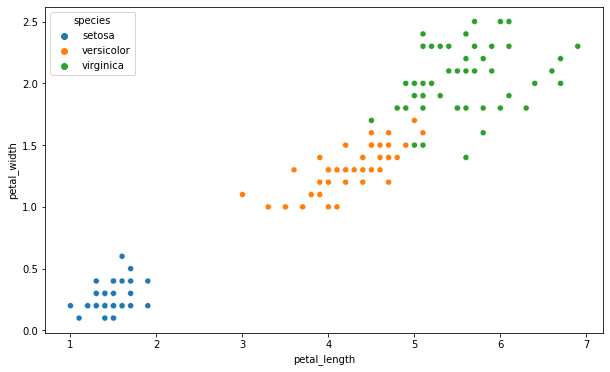

In [8]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='petal_length', y='petal_width', hue='species')
plt.show()

In [9]:
# X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
X = df.drop(['species', 'species_num'], axis=1)
y = df['species_num']

In [10]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species_num, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [14]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')

In [15]:
model.fit(X_train, y_train)

c:\program files\python36\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(multi_class='multinomial')

In [16]:
yhat_test = model.predict(X_test)

In [17]:
yhat_test[0:5]

array([2, 0, 2, 1, 1], dtype=int64)

In [18]:
yhat_test_proba = model.predict_proba(X_test)

In [19]:
yhat_test_proba[0:5]

array([[7.56520961e-05, 5.10988644e-02, 9.48825484e-01],
       [9.64669020e-01, 3.53308941e-02, 8.56612195e-08],
       [7.90921539e-04, 4.96412175e-01, 5.02796903e-01],
       [3.05773273e-02, 9.17018664e-01, 5.24040088e-02],
       [8.70402714e-03, 9.33942778e-01, 5.73531948e-02]])

In [20]:
# kiểm tra độ chính xác R^2
model.score(X_test, y_test)

0.9333333333333333

In [23]:
df_new = pd.DataFrame({'Actual': pd.DataFrame(y_test.values)[0].values,
                      'Predicted': pd.DataFrame(yhat_test)[0].values})

In [24]:
df_new.head()

,Actual,Predicted
0,2,2
1,0,0
2,1,2
3,1,1
4,1,1


In [25]:
X_test.head()

,sepal_length,sepal_width,petal_length,petal_width
148,6.2,3.4,5.4,2.3
9,4.9,3.1,1.5,0.1
77,6.7,3.0,5.0,1.7
88,5.6,3.0,4.1,1.3
74,6.4,2.9,4.3,1.3


In [26]:
X_new = [[4.8, 3.3, 1.6, 0.3]]
y_new = model.predict(X_new)
y_new

array([0], dtype=int64)